<a href="https://colab.research.google.com/github/JakeDespa/ADV-Mob-Dev/blob/main/Copy_of_ias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================================
# Network Security Log Analysis with ML
# ===============================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2️⃣ Load Dataset
df = pd.read_csv("/content/cybersecurity_threat_detection_logs.csv")
print("✅ Dataset loaded successfully!")
print(df.info())
display(df.head())

# 3️⃣ Data Cleaning
# Drop rows with missing essential values
df = df.dropna(subset=['timestamp', 'source_ip', 'dest_ip', 'threat_label'])

# Fill remaining missing numerical/categorical data
df = df.fillna({
    'severity': 'medium',   # replace missing severity with 'medium'
})

# 4️⃣ Convert timestamp to datetime and extract useful features
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday

# 5️⃣ Encode categorical features
label_encoders = {}
for col in ['source_ip', 'dest_ip', 'threat_label', 'protocol', 'action', 'log_type', 'user_agent', 'request_path']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 6️⃣ Check if 'attack_label' exists; if not, create a dummy one for demo
if 'attack_label' not in df.columns:
    print("⚠️ No 'attack_label' column found. Creating demo labels (0=normal, 1=attack).")
    df['attack_label'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])

# 7️⃣ Define features and target
X = df.drop(['attack_label', 'timestamp'], axis=1)
y = df['attack_label']

# 8️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9️⃣ Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔟 Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔍 Predictions & Evaluation
y_pred = model.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 1️⃣1️⃣ Visualize Attack Trends Over Time
attack_trends = df.groupby([df['timestamp'].dt.date, 'threat_label']).size().unstack(fill_value=0)
attack_trends.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Attack Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# 1️⃣2️⃣ Feature Importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance in Attack Prediction")
plt.show()

print("✅ Analysis complete!")

✅ Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   timestamp          object
 1   source_ip          object
 2   dest_ip            object
 3   protocol           object
 4   action             object
 5   threat_label       object
 6   log_type           object
 7   bytes_transferred  int64 
 8   user_agent         object
 9   request_path       object
dtypes: int64(1), object(9)
memory usage: 457.8+ MB
None


,timestamp,source_ip,dest_ip,protocol,action,threat_label,log_type,bytes_transferred,user_agent,request_path
0,2024-05-01T00:00:00,192.168.1.125,192.168.1.124,TCP,blocked,benign,firewall,10889,Nmap Scripting Engine,/
1,2024-07-18T00:00:00,192.168.1.201,192.168.1.201,ICMP,blocked,benign,application,36522,Nmap Scripting Engine,/
2,2024-04-07T00:00:00,192.168.1.248,192.168.1.15,HTTP,allowed,benign,application,20652,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/login
3,2024-10-26T00:00:00,192.168.1.236,192.168.1.219,HTTP,allowed,benign,application,5350,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,/login
4,2024-10-31T00:00:00,192.168.1.221,192.168.1.61,ICMP,allowed,benign,application,40691,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/


⚠️ No 'attack_label' column found. Creating demo labels (0=normal, 1=attack).


🔍 Optimized LAB REPORT: Network Security Log Analysis

📂 Loading dataset sample...
✅ Loaded 200000 rows successfully.

✅ Missing values handled.
✅ Timestamp converted and features extracted.

🔠 Encoding categorical variables...
✅ Label encoding complete.

🌲 Training Random Forest (light mode)...
✅ Model trained successfully.

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     32007
           1       0.00      0.00      0.00      7993

    accuracy                           0.80     40000
   macro avg       0.40      0.50      0.44     40000
weighted avg       0.64      0.80      0.71     40000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


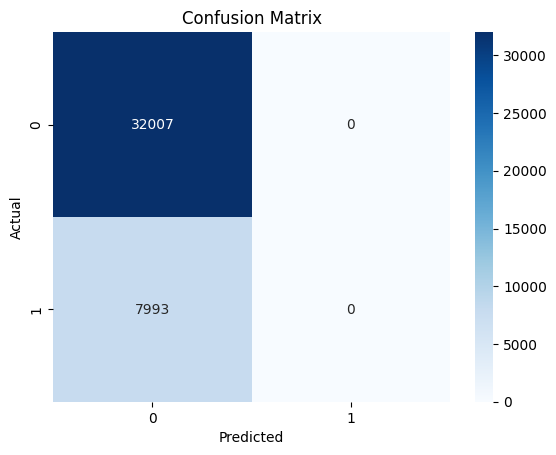


📈 Generating smaller attack trend plot...


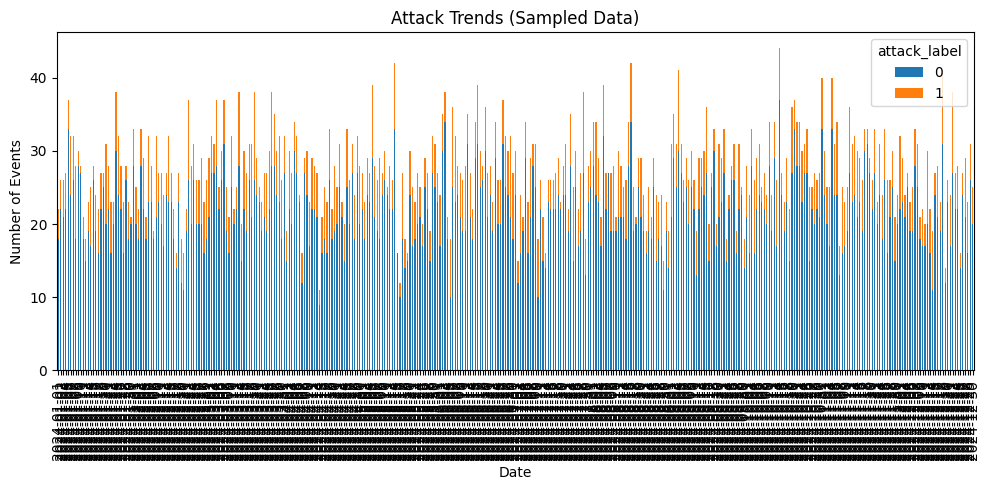

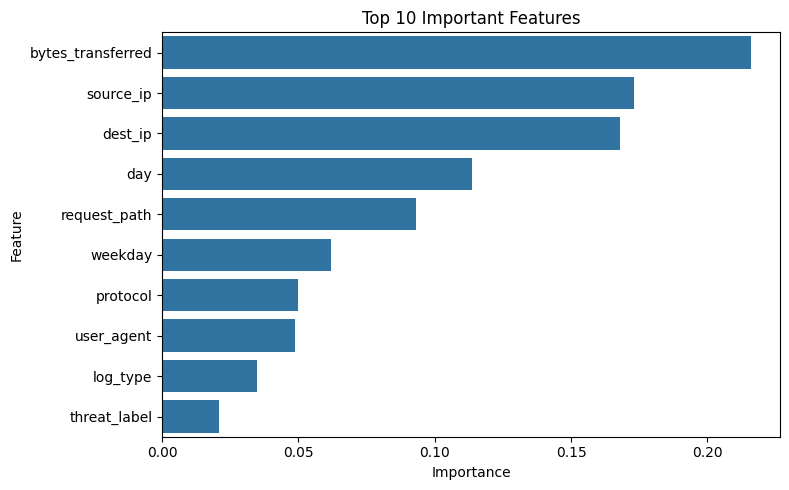


✅ Analysis complete with reduced memory footprint.


78717

In [ ]:
# ===============================================
# ⚡ Optimized Network Security Log Analysis (Colab-safe)
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Display settings
pd.set_option('display.max_columns', None)

print("===============================================")
print("🔍 Optimized LAB REPORT: Network Security Log Analysis")
print("===============================================")

# 📂 1️⃣ Load only sample of the dataset to avoid RAM crash
print("\n📂 Loading dataset sample...")
df_iter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cybersecurity_threat_detection_logs.csv", chunksize=200000)
df = next(df_iter)  # take first chunk only (~200k rows)
print(f"✅ Loaded {len(df)} rows successfully.\n")

# 🧹 2️⃣ Data Cleaning
df = df.dropna(subset=['timestamp', 'source_ip', 'dest_ip', 'threat_label'])
# Removed the fillna for severity as the column doesn't exist
print("✅ Missing values handled.")

# 🕒 3️⃣ Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday
print("✅ Timestamp converted and features extracted.")

# 🔠 4️⃣ Encode limited categorical features
print("\n🔠 Encoding categorical variables...")
small_cat_cols = ['protocol', 'action', 'log_type', 'user_agent', 'request_path'] # Removed 'severity'
for col in small_cat_cols:
    df[col] = df[col].astype('category').cat.codes

# Hash-based encoding for large string columns
df['source_ip'] = df['source_ip'].apply(lambda x: hash(x) % 50000)
df['dest_ip'] = df['dest_ip'].apply(lambda x: hash(x) % 50000)
df['threat_label'] = df['threat_label'].apply(lambda x: hash(x) % 500)

# ⚠️ 5️⃣ Add attack label if missing
if 'attack_label' not in df.columns:
    df['attack_label'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])
print("✅ Label encoding complete.")

# 🎯 6️⃣ Define features & target
X = df.drop(['attack_label', 'timestamp'], axis=1)
y = df['attack_label']

# 🧪 7️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ 8️⃣ Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🌲 9️⃣ Train lightweight Random Forest
print("\n🌲 Training Random Forest (light mode)...")
model = RandomForestClassifier(
    n_estimators=50,    # reduced from 100
    max_depth=10,       # limit depth to save memory
    n_jobs=-1,          # use all cores efficiently
    random_state=42
)
model.fit(X_train_scaled, y_train)
print("✅ Model trained successfully.")

# 🧮 🔟 Evaluate
y_pred = model.predict(X_test_scaled)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 1️⃣1️⃣ Attack Trend Visualization (sampled)
print("\n📈 Generating smaller attack trend plot...")
sampled_trends = df.sample(10000).copy()  # plot only 10k rows
sampled_trends['timestamp'] = pd.to_datetime(sampled_trends['timestamp'], errors='coerce')
attack_trends = sampled_trends.groupby(
    [sampled_trends['timestamp'].dt.date, 'attack_label']
).size().unstack(fill_value=0)

attack_trends.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Attack Trends (Sampled Data)")
plt.xlabel("Date")
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

# 🌟 1️⃣2️⃣ Feature Importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

print("\n✅ Analysis complete with reduced memory footprint.")

# 🧹 Clean up
del df, X_train_scaled, X_test_scaled, y_train, y_test
gc.collect()